# Exercise 3

Let 

$$X=
\begin{pmatrix}
0 & -1\\
0 & -2\\
1 & 4\\
2 & 1\\
4 & -4\\
4 & -3\\
5 & 6\\
6 & 2
\end{pmatrix}, \,
y=
\begin{pmatrix}
1\\
-1\\
1\\
1\\
-1\\
1\\
-1\\
\end{pmatrix}
$$

be the data matrix and the vector of actual labels for a classification problem, respectively

(a) Represent the feature vectors in a Cartesian plane. Use different shapes to differentiate among classes: little circles for vectors with “-1” label and plus signs for vectors with “1” label.

(b) To separate the data we can use a single-layer perceptron with three neurons (taking the first one as the threshold). Take

$$
y=
\begin{pmatrix}
-7\\
2\\
1
\end{pmatrix}
$$

(c) Execute the gradient descent perceptron algorithm for these data and write a table of the weights for subsequent learning epochs.

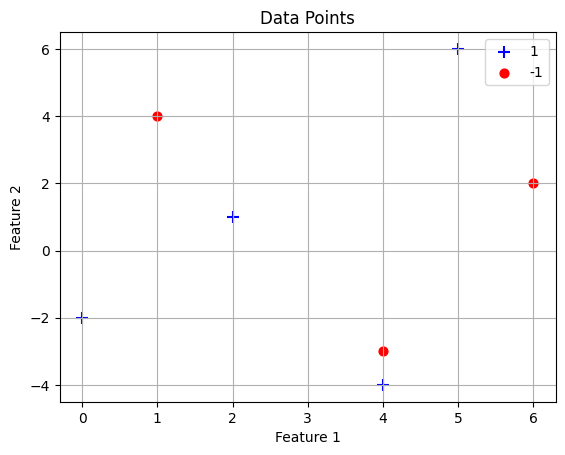

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0, -2],
    [1, 4],
    [2, 1],
    [4, -4],
    [4, -3],
    [5, 6],
    [6, 2]
])

y = np.array([1, -1, 1, 1, -1, 1, -1])

def plot_data(X, y):
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='+', s=80, label='1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='o', s=40, label='-1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data Points')
    plt.legend()
    plt.grid()
    plt.show()

plot_data(X, y)

